<font size = 5> Лабораторная работа: Задача о минимальном остовном дереве: алгоритм Краскала на массиве и на дереве без рангов вершин (Kruskal's algorithm). Разделенное множество (DisJoint Sets) </font>



Цель работы: реализация, сравнение и анализ двух алгоритмов, решающих одну и ту же задачу. 

Данные: программа предусматривает пользовательский ввод данных для небольших значений параметров (визуализация входных данных и ответ по задаче), а также предусматривает автоматическую генерацию растущих входных данных и построение графика производительности в зависимости от параметра.

<font size = 4>Алгоритм: </font>

1) производится сортировка рёбер по невозрастанию веса

2) i-ое ребро добавляется только в том случае, если данное ребро соединяет две разные компоненты связности, одной из которых является подграф. То есть, на каждом шаге добавляется минимальное по весу ребро, один конец которого содержится в подграфе, а другой - еще нет

3) Алгоритм завершит свою работу после того, как множество вершин подграфа совпадет с множеством вершин исходного графа. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

<font size = 4>Генератор случайных взвешенных связных графов</font>
    
G(V0, V1, w) в виде списка ребер, где V0 - вершина 1, V1 - вершина 2, w - вес ребра

In [10]:
import random

class RandomGraph:
    def __init__(self, nodes, meanDegree, meanWeight):
        self.nodes = nodes
        self.meanDegree = meanDegree
        self.meanWeight = meanWeight
        self.edges = 0
        self.weight = 0
        self.graph = [[0 for i in range(0, self.nodes)] for j in range(0, self.nodes)]
        self.positions = [(i,j) for i in range(0, self.nodes) for j in range(0, self.nodes) if i < j]
        random.shuffle(self.positions)

    def avgDegree(self):
        return (self.edges * 2.0) / self.nodes

    def avgWeight(self):
        return self.weight / self.edges

    def addEdge(self, i, j, weight = 1):
        if self.graph[i][j] == 0 and self.graph[j][i] == 0:
            self.graph[i][j] = weight
            self.graph[j][i] = weight
            self.edges += 1
            self.weight += weight
            self.positions.remove((i, j))

    def addWeight(self, i, j, add = 1):
        if self.graph[i][j] > 0:
            self.graph[i][j] += add
            self.graph[j][i] += add
            self.weight += add

    def removeEdge(self, i, j):
        self.graph[i][j] = 0
        self.graph[j][i] = 0

    def getEdges(self):
        return [(i, j, self.graph[i][j]) for i in range(0, self.nodes) for j in range(0, self.nodes) if i < j and self.graph[i][j] > 0]

    def createGraph(self):
        # Сначала соединяем четные узлы с нечетными узлами
        for i in range(0, self.nodes, 2):
            if self.avgDegree() >= self.meanDegree:
                break
            if i + 1 < self.nodes:
                self.addEdge(i, i + 1)
        # Теперь соединяем нечетные узлы с четными узлами
        for i in range(1, self.nodes, 2):
            if self.avgDegree() >= self.meanDegree:
                break
            if i + 1 < self.nodes:
                self.addEdge(i, i + 1)
        if self.avgDegree() < self.meanDegree:
            # Замкнуть цикл
            self.addEdge(0, self.nodes - 1)
        # Назначаем ребра случайным образом, пока не достигнем средней степени
        while(len(self.positions) > 0):
            if self.avgDegree() >= self.meanDegree:
                break
            (i, j) = self.positions[0]
            self.addEdge(i, j)
        # Увеличиваем веса, пока не достигнем нужного среднего значения
        existingEdges = self.getEdges()
        while(self.avgWeight() < self.meanWeight):
            (i, j, weight) = random.choice(existingEdges)
            self.addWeight(i, j)

n = 25                            # кол-во узлов в графе
        
graph = RandomGraph(n, 7, 10)    # (кол-во узлов, средняя степень узла, средний вес ребра)
graph.createGraph()
G = graph.getEdges()
Gr = G
print("Все вершины графа с весами, где (Вершина1, Вершина2, Вес ребра)\n", G)


Все вершины графа с весами, где (Вершина1, Вершина2, Вес ребра)
 [(0, 1, 14), (0, 6, 8), (0, 9, 11), (0, 11, 8), (0, 14, 13), (0, 15, 12), (0, 17, 6), (0, 21, 8), (0, 23, 12), (0, 24, 12), (1, 2, 11), (1, 5, 11), (1, 18, 11), (1, 21, 5), (2, 3, 16), (2, 4, 12), (2, 6, 9), (2, 7, 16), (2, 12, 11), (2, 21, 7), (2, 22, 9), (3, 4, 14), (3, 5, 11), (3, 7, 8), (3, 14, 7), (3, 16, 11), (3, 20, 7), (4, 5, 5), (4, 9, 7), (4, 10, 5), (4, 12, 17), (4, 14, 11), (4, 18, 8), (4, 19, 11), (5, 6, 9), (5, 9, 8), (5, 10, 10), (5, 15, 9), (5, 21, 7), (5, 22, 14), (5, 24, 10), (6, 7, 11), (6, 8, 11), (6, 9, 12), (6, 13, 9), (6, 15, 8), (6, 17, 14), (6, 22, 12), (7, 8, 7), (7, 13, 11), (7, 19, 14), (8, 9, 8), (8, 13, 8), (8, 15, 16), (8, 19, 11), (9, 10, 10), (10, 11, 7), (10, 12, 5), (10, 22, 6), (11, 12, 8), (11, 21, 9), (11, 23, 11), (12, 13, 8), (12, 20, 13), (12, 24, 5), (13, 14, 6), (13, 24, 4), (14, 15, 10), (14, 19, 10), (15, 16, 11), (15, 18, 11), (15, 19, 10), (15, 20, 20), (16, 17, 9), (16, 22, 

# Алгоритм Краскала на массиве

In [13]:
start_time = time.time()
G_sort = sorted(G, key = lambda x:x[2])          # сортировать массив по весу ребра
sets = set()                                     # множество соединенных вершин
vertex = {}                                      # словарь списка вершин
MST = []                                         # список ребер остовного дерева MST
for v in G_sort:                                 
    if v[0] not in sets or v[1] not in sets:     
        if v[0] not in sets and v[1] not in sets:# если обе вершины V0, V1 не в множестве соединенных вершин
            vertex[v[0]] = [v[0],v[1]]           # формируем ключ в словаре с номерами вершин
            vertex[v[1]] = vertex[v[0]]          # связываем их с тем же списком вершин
        else:                                    # Иначе (изолированная только 1 вершина)
            if not vertex.get(v[0]):             # если нет первой вершинры в словаре
                vertex[v[1]].append(v[0])        # добавить ее
                vertex[v[0]] = vertex[v[1]]      # добавить ключ с номером этой вершины
            else:
                vertex[v[0]].append(v[1])        # тоже самое для второй вершины
                vertex[v[1]] = vertex[v[0]]
        MST.append(v)                            # добавить найденное ребро к остову
        sets.add(v[0])                           
        sets.add(v[1])

#Далее пройдемся по ребрам еще раз и объединим между собой получившиеся множества вершин

for v in G_sort:                                 # если вершины принадлежат разным множествам:
    if v[1] not in vertex[v[0]]: 
        MST.append(v)                            # добавить к MST
        v_1 = vertex[v[0]]
        vertex[v[0]] += vertex[v[1]]             # объеденить два множества вершин           
        vertex[v[1]] += v_1
print("MST: ", MST)    
time_off1 = (time.time() - start_time)*1000
print (f"Время работы {time_off1} ms")

MST:  [(13, 24, 4), (1, 21, 5), (4, 5, 5), (4, 10, 5), (10, 12, 5), (17, 18, 5), (0, 17, 6), (10, 22, 6), (13, 14, 6), (2, 21, 7), (3, 14, 7), (3, 20, 7), (4, 9, 7), (7, 8, 7), (10, 11, 7), (19, 20, 7), (0, 6, 8), (6, 15, 8), (16, 17, 9), (17, 23, 9), (12, 24, 5), (5, 21, 7), (0, 11, 8), (3, 7, 8), (20, 21, 8), (2, 6, 9), (14, 15, 10), (8, 15, 16)]
Время работы 3.7577152252197266 ms


## Алгоритм Краскала на дереве без рангов вершин

Реализуем алгоритм Краскала с использованием древовидной структуры данных разделенных множеств

In [16]:
class DisJointSet:                               # Класс разделенных множеств. Каждое подмножество коллекции - корневое дерево,
    parent = {}                                  # узлы которого эл-ты этого подмножества

                                                 # Базовые операции:
    def makeSet(self, n):                        # Создать                                     ***O(n)
        for i in range(n):                       # назначить родителем узла сам узел (n - по одному на каждую вершину)
            self.parent[i] = i
    
    def find(self, k):                           # Найти элемент множества                     ***O(h) h-высота дерева
        if self.parent[k] == k:                  # k - корень
            return k        
        return self.find(self.parent[k])         # повторить для родителя, пока не найдем корень
    
    def union(self, a, b):                       # Объединить два множества                    ***O(1)
        x = self.find(a)                         # найти корень множеств, которым принадлежат x и y соответственно
        y = self.find(b)
        self.parent[x] = y                       # назначить узел y родителем узла х
        

def KruskalAlg(edges, n):                        # Функция построения MST с использованием алгоритма Краскала     
    MST = []                                             
    djs = DisJointSet()                          # Инициализируем класс DisjointSet
    djs.makeSet(n)                               # Создать отдельное множество (синглетон) для каждой вершины ***O(n)
    index = 0    
    edges.sort(key=lambda x: x[2])               # сортирует ребра по возрастанию веса         ***O(m*logn)
    while len(MST) != n - 1:                     # MST содержит количество ребер: V-1        ***O(m*Slogn) Slogn-суперлогарифм  
        (u, v, weight) = edges[index]            # u - вершина 1, v - вершина 2, weight - вес
        index = index + 1   
        x = djs.find(u)                          # найти u в множестве x
        y = djs.find(v)                          # найти v в множестве y        
        if x != y:                               # если x, y принадлежат разным множествам
            MST.append((u, v, weight))           # могут быть включены в MST
            djs.union(x, y)                      # объединить (x, y)
    return MST 

start_time2 = time.time()
if __name__ == '__main__':   
    edges = G
    ans = KruskalAlg(edges, n)   
    print("MST: ", ans)
    time_off2 = (time.time() - start_time2)*1000
    print (f"Время работы {time_off2} ms")

MST:  [(13, 24, 4), (1, 21, 5), (4, 5, 5), (4, 10, 5), (10, 12, 5), (12, 24, 5), (17, 18, 5), (0, 17, 6), (10, 22, 6), (13, 14, 6), (2, 21, 7), (3, 14, 7), (3, 20, 7), (4, 9, 7), (5, 21, 7), (7, 8, 7), (10, 11, 7), (19, 20, 7), (0, 6, 8), (0, 11, 8), (3, 7, 8), (6, 15, 8), (16, 17, 9), (17, 23, 9)]
Время работы 4.970550537109375 ms




<font size = 4>Изобразим графически полученный результат</font>


Text(0.5, 1.0, 'Сгенерированный взвешенный граф')

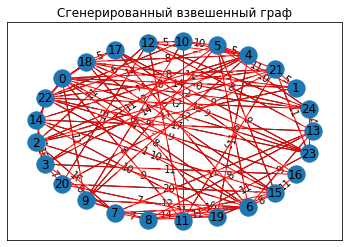

In [17]:
G3 = nx.Graph()
G3.add_weighted_edges_from(Gr)
weights = nx.get_edge_attributes(G3, 'weight')
pos = nx.circular_layout(G3)
nx.draw_networkx(G3, pos=pos)
nx.draw_networkx_edge_labels(G3, pos, edge_labels=weights)
nx.draw_networkx_edges(G3, pos=pos, edgelist=edges, edge_color="r", width=1)
title = "Сгенерированный взвешенный граф"
plt.title(title)

Text(0.5, 1.0, 'Алгоритм Краскала на массиве')

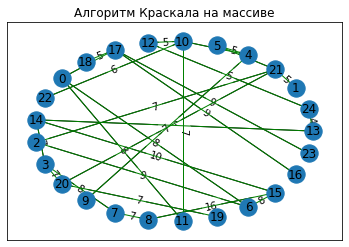

In [18]:
G1 = nx.Graph()
G1.add_weighted_edges_from(MST)
weights = nx.get_edge_attributes(G1, 'weight')
pos = nx.circular_layout(G1)
nx.draw_networkx(G1, pos=pos)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=weights)
nx.draw_networkx_edges(G1, pos=pos, edge_color="g", width=1)
title = "Алгоритм Краскала на массиве"
plt.title(title)

Text(0.5, 1.0, 'Алгоритм Краскала на дереве без рангов вершин')

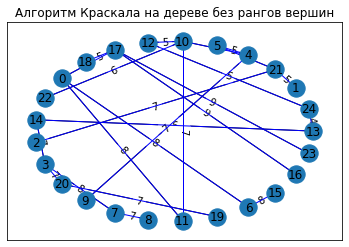

In [19]:
G2 = nx.Graph()
G2.add_weighted_edges_from(ans)
weights = nx.get_edge_attributes(G2, 'weight')
pos = nx.circular_layout(G2)
nx.draw_networkx(G2, pos=pos)
nx.draw_networkx_edge_labels(G2, pos, edge_labels=weights)
nx.draw_networkx_edges(G2, pos=pos, edge_color="b", width=1)
title = "Алгоритм Краскала на дереве без рангов вершин"
plt.title(title)

<font size = 4>Анализ производительности алгоритмов</font>

Кол-во узлов графа:'vertices', 

время работы алгоритма Краскала на массиве: 'alg_array',

время работы алгоритма Краскала на дереве без рангов вершин: 'alg_tree'.

Кол-во узлов от 5 до 305, шаг 20, средняя степень узла 7, средний вес ребра 10.

In [8]:
import matplotlib.pyplot as plt
columns = ['vertices', 'alg_array', 'alg_tree']
df = pd.read_excel('D:\kraskal.xlsx',
                   header = None,
                   names = columns,
                  )
print(df)

    vertices   alg_array  alg_tree
0          5    1.190424  0.998735
1         25    1.000881  1.000166
2         45    1.001120  0.999212
3         65    4.004955  0.999451
4         85    3.003359  1.000750
5        105   12.162209  0.990152
6        125   31.790257  1.998901
7        145   37.502527  2.001286
8        165   45.349598  1.955032
9        185   46.433687  3.377199
10       205   73.829651  2.768993
11       225   77.955008  1.998901
12       245   94.976425  2.993822
13       265  193.237686  2.033710
14       285  211.044312  4.988432
15       305  393.059492  6.000996


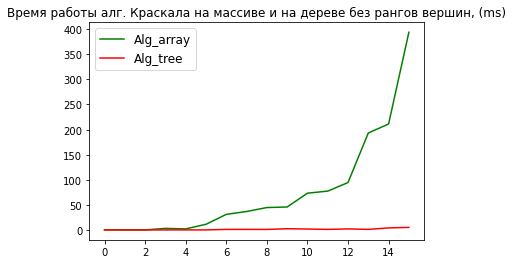

In [9]:
import pylab
pylab.subplot (1, 1, 1)
pylab.plot (df['alg_array'], label="Alg_array", color = 'g')
pylab.plot (df['alg_tree'], label="Alg_tree", color = 'r')
pylab.title ("Время работы алг. Краскала на массиве и на дереве без рангов вершин, (ms)")
pylab.legend(loc='best', fontsize=12)
pylab.show()

Вывод: алгоритм на древестной структуре работает несравнимо быстрее, чем алгоритм на массиве. 